# Visualization

To understand how the our model make classification decision, we try to visualize the feature maps which is the output of the convolutional layer.

In [2]:
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from skimage import io, util, color, transform
from keras.models import load_model
from keras.utils import to_categorical
import keras.backend as K

sys.path.append('../src/')
import data_utils
import img_plot
import guided_grad_cam as gc

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


## load model and data

In [3]:
# load model

model = load_model('../data/models/model_v1.h5')
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 120, 80, 64)       640       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 40, 128)       73856     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 20, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 30, 20, 256)       295168    
__________________________________________________________

In [ ]:
# load labels and training data

# load validation data

data_validation_pos = np.load('../data/output/data_set/data_validation_pos.npy')
data_validation_neg = np.load('../data/output/data_set/data_validation_neg.npy')

exp_pos = data_validation_pos[0].reshape(1,120,80,1)
exp_neg = data_validation_neg[0].reshape(1,120,80,1)

## build saliency map

In [ ]:
gc.register_gradient()
modified_model = gc.modify_backprop('../data/models/model_v1.h5')
saliency_func = gc.compile_saliency_function(modified_model, activation_layer='block3_conv1')

In [ ]:
saliency_map_pos = saliency_func([exp_pos])[0]
saliency_map_neg = saliency_func([exp_neg])[0]

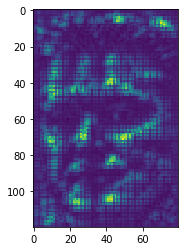

In [17]:
plt.imshow(saliency_map_pos.reshape(120,  80))
plt.show()

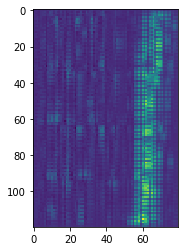

In [18]:
plt.imshow(saliency_map_neg.reshape(120,  80))
plt.show()